In [1]:
#Tamim Mahmud from Daffodil International University
#08/07/2025
#Day->18

🚀Part->6

Data Transform


Saving 497498529_122131075424757252_7022330237675412771_n.jpg to 497498529_122131075424757252_7022330237675412771_n (3).jpg
Tensor Shape: torch.Size([3, 960, 960])
Min Value: 0.0
Max Value: 1.0


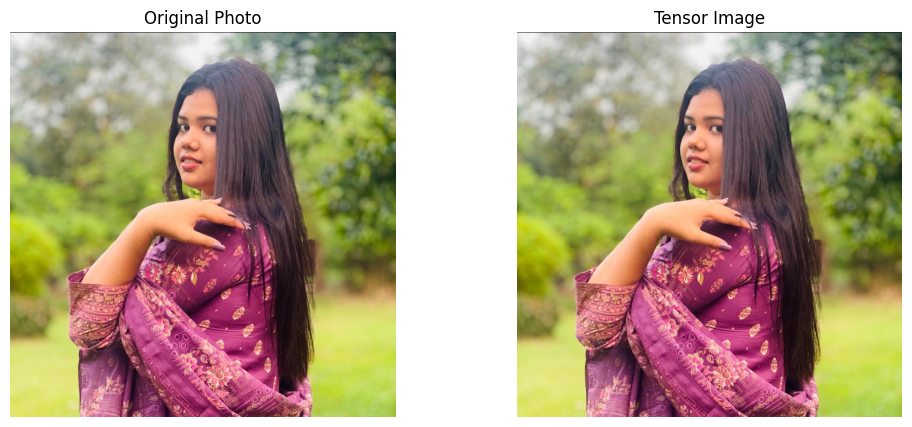

In [7]:
import torchvision.transforms as transforms

from PIL import Image
from google.colab import files

upload=files.upload()

img=Image.open(next(iter(upload))).convert('RGB')

transform=transforms.ToTensor()
tensor_img=transform(img)

print("Tensor Shape:",tensor_img.shape)
print("Min Value:",tensor_img.min().item())
print("Max Value:",tensor_img.max().item())

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Photo")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(tensor_img.permute(1,2,0))
plt.title('Tensor Image')
plt.axis('off')
plt.show()

Saving 497498529_122131075424757252_7022330237675412771_n.jpg to 497498529_122131075424757252_7022330237675412771_n (6).jpg
Tensor Shape: torch.Size([3, 128, 128])
Min Value: -1.0
Max Value: 1.0


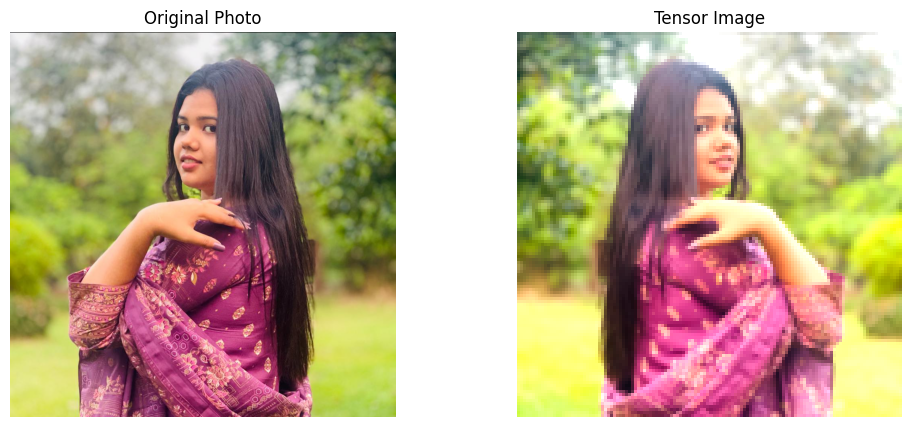

In [11]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

upload=files.upload()

img=Image.open(next(iter(upload))).convert('RGB')

transform=transforms.Compose([
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5],
                         std=[0.5,0.5,0.5])
])

tensor_img=transform(img)

unnormalize=transforms.Normalize(
    mean=[-1,-1,-1],
    std=[1/0.5,1/0.5,1/0.5]
)

img_for_display=unnormalize(tensor_img).clamp(0,1)

print("Tensor Shape:",tensor_img.shape)
print("Min Value:",tensor_img.min().item())
print("Max Value:",tensor_img.max().item())

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

plt.imshow(img)
plt.title("Original Photo")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_for_display.permute(1,2,0))
plt.title("Tensor Image")
plt.axis('off')
plt.show()



Saving 497498529_122131075424757252_7022330237675412771_n.jpg to 497498529_122131075424757252_7022330237675412771_n (11).jpg


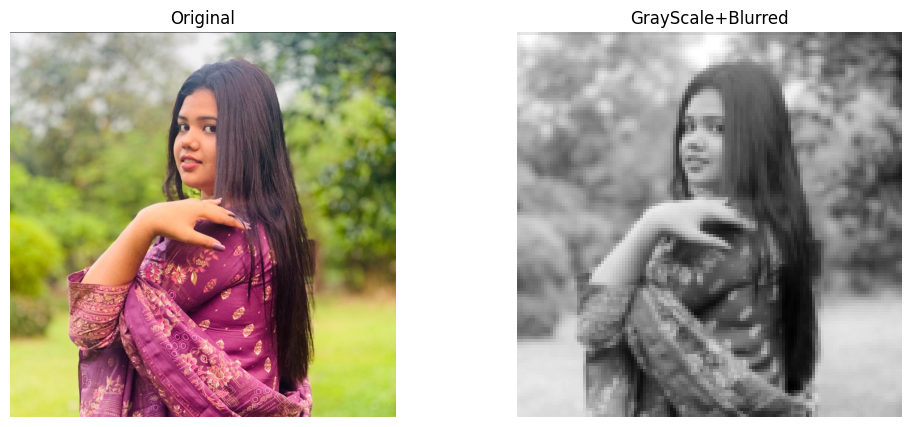

Tensor shape: torch.Size([1, 128, 128])
Max Value: 0.9529411792755127
Min Value: 0.04313725605607033


In [17]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

upload=files.upload()

img=Image.open(next(iter(upload))).convert("RGB")

transform=transforms.Compose([
    transforms.Resize((128,128)),
    transforms.Grayscale(num_output_channels=1),
    transforms.GaussianBlur(kernel_size=5),
    transforms.ToTensor()
])

tensor_img=transform(img)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(tensor_img.squeeze(),cmap='gray')
plt.title("GrayScale+Blurred")
plt.axis('off')
plt.show()

print("Tensor shape:",tensor_img.shape)
print("Max Value:",tensor_img.max().item())
print("Min Value:",tensor_img.min().item())


Saving 497498529_122131075424757252_7022330237675412771_n.jpg to 497498529_122131075424757252_7022330237675412771_n (16).jpg


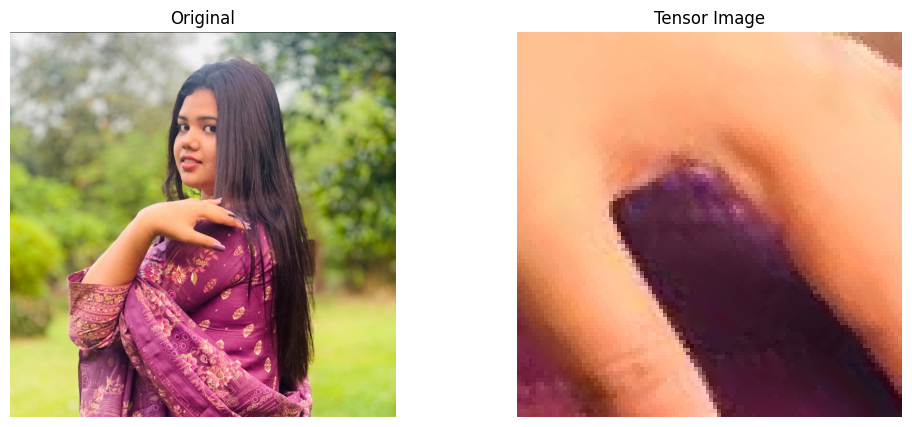

Tensor shape: torch.Size([3, 100, 100])
Max Value: 1.0
Min Value: 0.0117647061124444


In [22]:
#✅ উদাহরণ ১: RandomRotation + CenterCrop

#🔸 ছবিকে র‍্যান্ডমভাবে ঘুরিয়ে ফেলে (যেকোনো দিকেই)
#🔸 তারপর মাঝখান থেকে 100×100 অংশ কেটে নেয়

#👉 ব্যবহারঃ রিয়েল লাইফ ছবি যখন ঘুরে থাকতে পারে — তার সাথে মডেলকে মানিয়ে নেওয়া শেখাতে।

from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

upload=files.upload()

img=Image.open(next(iter(upload))).convert("RGB")

transform=transforms.Compose([
    transforms.RandomRotation(degrees=180),
    transforms.CenterCrop((100,100)),
    transforms.ToTensor()
])

tensor_img=transform(img)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(tensor_img.permute(1,2,0))
plt.title("Tensor Image")
plt.axis('off')
plt.show()

print("Tensor shape:",tensor_img.shape)
print("Max Value:",tensor_img.max().item())
print("Min Value:",tensor_img.min().item())



Saving 497498529_122131075424757252_7022330237675412771_n.jpg to 497498529_122131075424757252_7022330237675412771_n (17).jpg


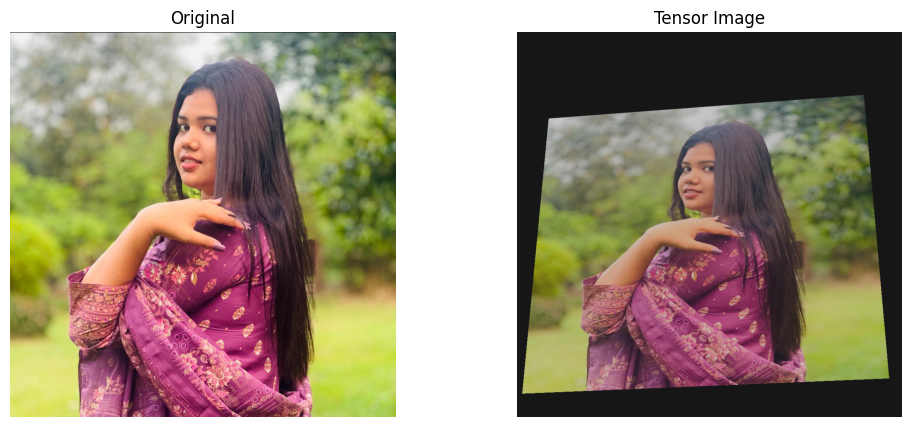

Tensor shape: torch.Size([3, 960, 960])
Max Value: 0.8156862854957581
Min Value: 0.06666667014360428


In [23]:
#✅ উদাহরণ ২: RandomPerspective + ColorJitter
#🔸 RandomPerspective ছবিকে ত্রিভুজের মতো বাঁকিয়ে দেয়
#🔸 ColorJitter ছবির আলো, কনট্রাস্ট, স্যাচুরেশন র‍্যান্ডমভাবে পরিবর্তন করে

#👉 ব্যবহারঃ ডেটাকে বিভিন্ন angle ও আলোতে দেখতে শেখানো


from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

upload=files.upload()

img=Image.open(next(iter(upload))).convert("RGB")

transform=transforms.Compose([
    transforms.RandomPerspective(distortion_scale=0.5,p=1.0),
    transforms.ColorJitter(brightness=0.3,contrast=0.3,saturation=0.3),

    transforms.ToTensor()
])

tensor_img=transform(img)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(tensor_img.permute(1,2,0))
plt.title("Tensor Image")
plt.axis('off')
plt.show()

print("Tensor shape:",tensor_img.shape)
print("Max Value:",tensor_img.max().item())
print("Min Value:",tensor_img.min().item())



Saving 497498529_122131075424757252_7022330237675412771_n.jpg to 497498529_122131075424757252_7022330237675412771_n (18).jpg


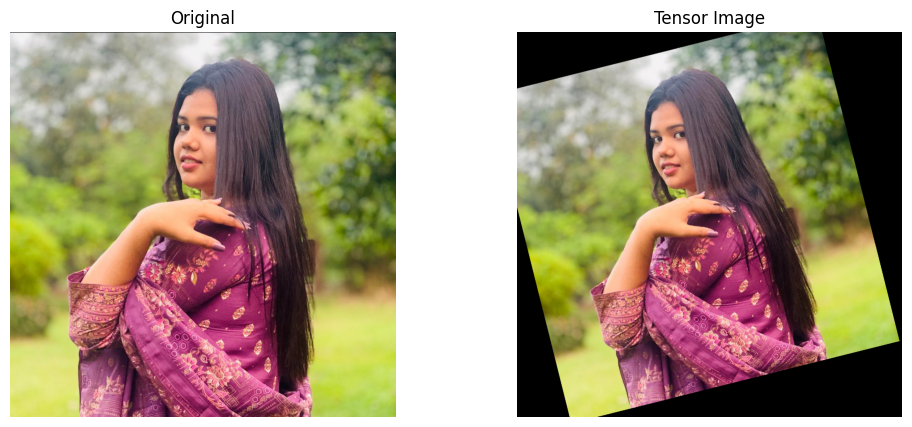

Tensor shape: torch.Size([3, 960, 960])
Max Value: 1.0
Min Value: 0.0


In [24]:
#✅ উদাহরণ ৩: RandomAffine (Translation + Rotation + Scaling)

#🔸 ছবিকে ঘোরানো, সরানো এবং বড়-ছোট করা একসাথে করা যায়
#👉 ব্যবহারঃ ক্যামেরা হালকা নড়েচড়ে গেলে যা হয়, সেটা মডেলকে শেখানো

#✅ উদাহরণ ২: RandomPerspective + ColorJitter
#🔸 RandomPerspective ছবিকে ত্রিভুজের মতো বাঁকিয়ে দেয়
#🔸 ColorJitter ছবির আলো, কনট্রাস্ট, স্যাচুরেশন র‍্যান্ডমভাবে পরিবর্তন করে

#👉 ব্যবহারঃ ডেটাকে বিভিন্ন angle ও আলোতে দেখতে শেখানো


from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

upload=files.upload()

img=Image.open(next(iter(upload))).convert("RGB")

transform=transforms.Compose([
    transforms.RandomAffine(degrees=30,translate=(0.1,0.1),scale=(0.8,1.2)),

    transforms.ToTensor()
])

tensor_img=transform(img)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(tensor_img.permute(1,2,0))
plt.title("Tensor Image")
plt.axis('off')
plt.show()

print("Tensor shape:",tensor_img.shape)
print("Max Value:",tensor_img.max().item())
print("Min Value:",tensor_img.min().item())




Saving 481918719_1472191234185962_4291859168849423487_n.jpg to 481918719_1472191234185962_4291859168849423487_n.jpg


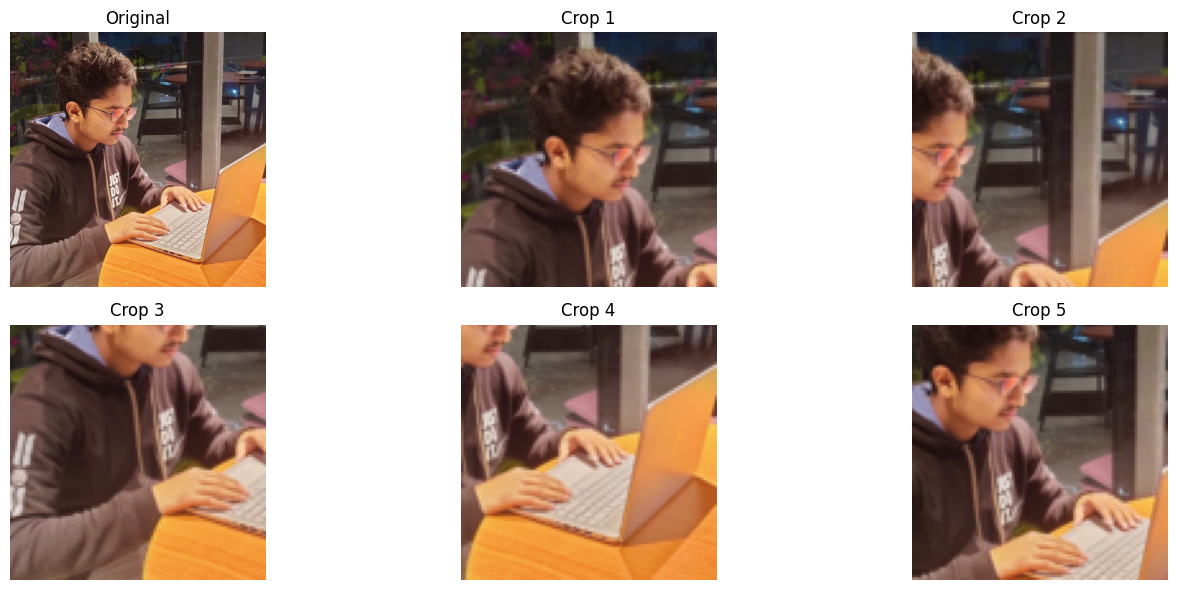

Tensor shape: torch.Size([5, 3, 100, 100])
Max value: 0.9882352948188782
Min value: 0.04313725605607033


In [29]:
#✅ উদাহরণ ৪: FiveCrop (Multiple Views of Same Image)
#🔸 এটা ৫টা ফসল কাটে: চারকোণা + মাঝখান
#🔸 তুমি চাইলে মডেলকে ৫টা view একসাথে দিতে পারো

#👉 ব্যবহারঃ Small dataset এ অনেক variation তৈরি করতে।



from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

# Upload and open image
upload = files.upload()
img = Image.open(next(iter(upload))).convert("RGB")

# Apply FiveCrop and convert all to tensors
transform = transforms.Compose([
    transforms.Resize(150),
    transforms.FiveCrop(100),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops]))
])

tensor_imgs = transform(img)  # Shape: [5, 3, 100, 100]

# Plot original + all 5 crops
plt.figure(figsize=(15,6))
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

for i in range(5):
    plt.subplot(2, 3, i+2)
    plt.imshow(tensor_imgs[i].permute(1, 2, 0))
    plt.title(f"Crop {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Tensor shape:", tensor_imgs.shape)  # [5, 3, 100, 100]
print("Max value:", tensor_imgs.max().item())
print("Min value:", tensor_imgs.min().item())


Saving 497498529_122131075424757252_7022330237675412771_n.jpg to 497498529_122131075424757252_7022330237675412771_n (21).jpg


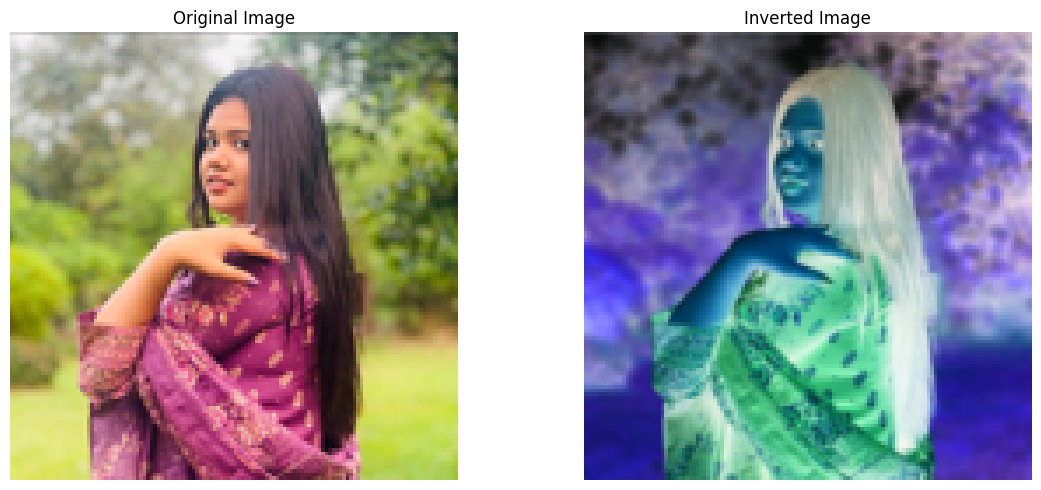

Tensor Shape: torch.Size([3, 128, 128])
Min Value: 0.0
Max Value: 1.0


In [27]:
#✅ উদাহরণ ৫: Custom Lambda Transform (Invert Image)

#🔸 এটা ছবির রঙ উল্টে দেয়: কালো → সাদা, সাদা → কালো

#👉 ব্যবহারঃ বিশেষ ধরনের preprocessing/filter effect

from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files
import torch

# Upload image
upload = files.upload()
img = Image.open(next(iter(upload))).convert("RGB")

# Transform: Resize + ToTensor + Invert color
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: 1 - x)  # Invert color
])

# Apply transform
tensor_img = transform(img)

# Plot original and inverted
plt.figure(figsize=(12,5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img.resize((128, 128)))  # resize for fair comparison
plt.title("Original Image")
plt.axis('off')

# Inverted image
plt.subplot(1, 2, 2)
plt.imshow(tensor_img.permute(1, 2, 0))
plt.title("Inverted Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# Tensor info
print("Tensor Shape:", tensor_img.shape)
print("Min Value:", tensor_img.min().item())
print("Max Value:", tensor_img.max().item())


Saving 497498529_122131075424757252_7022330237675412771_n.jpg to 497498529_122131075424757252_7022330237675412771_n (22).jpg


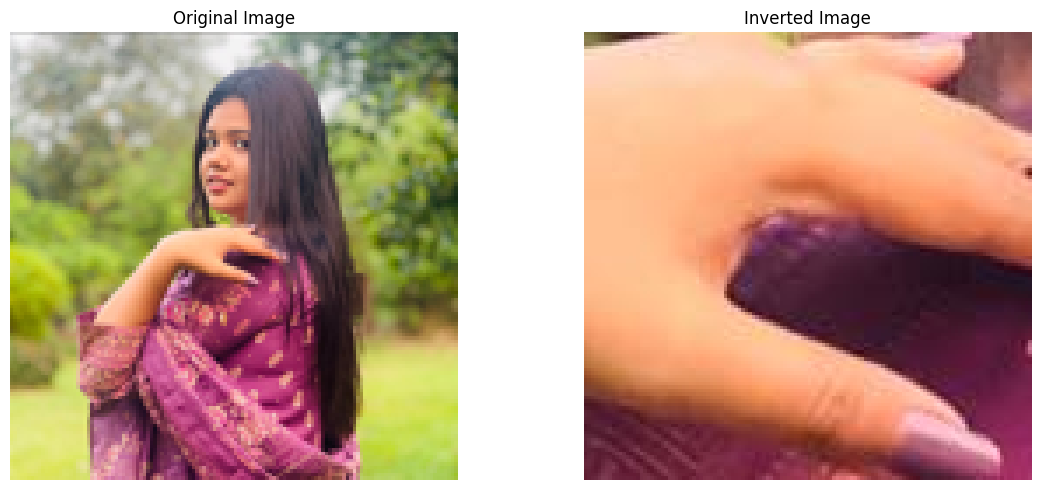

Tensor Shape: torch.Size([3, 128, 128])
Min Value: 0.0117647061124444
Max Value: 1.0


In [28]:
#✅ Example 6: Pad + CenterCrop

#📌 কাজ: ছবির চারপাশে padding দিয়ে পরে মাঝখান থেকে crop করে
#📌 প্রয়োগ: ছোট ছবিকে বড় করে center crop করতে

from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files
import torch

# Upload image
upload = files.upload()
img = Image.open(next(iter(upload))).convert("RGB")

# Transform: Resize + ToTensor + Invert color
transform = transforms.Compose([
    transforms.Pad(padding=10,fill=255),
    transforms.CenterCrop(128),
    transforms.ToTensor()


])

# Apply transform
tensor_img = transform(img)

# Plot original and inverted
plt.figure(figsize=(12,5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img.resize((128, 128)))  # resize for fair comparison
plt.title("Original Image")
plt.axis('off')

# Inverted image
plt.subplot(1, 2, 2)
plt.imshow(tensor_img.permute(1, 2, 0))
plt.title("Inverted Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# Tensor info
print("Tensor Shape:", tensor_img.shape)
print("Min Value:", tensor_img.min().item())
print("Max Value:", tensor_img.max().item())


In [ ]:
#Alhamdulillah for everything